**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Plot Activation Functions**

In [2]:
# Input range
x = np.linspace(-6, 6, 1000)

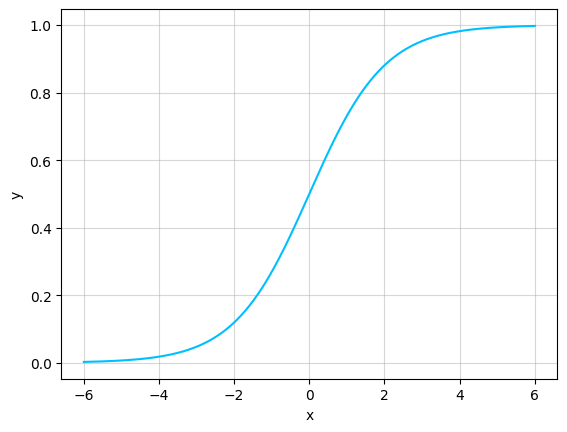

In [3]:
# Sigmoid function
y = 1 / (1 + np.exp(-x))

# Plot Sigmoid
plt.figure()
plt.plot(x, y, color='deepskyblue')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.5)
plt.show()

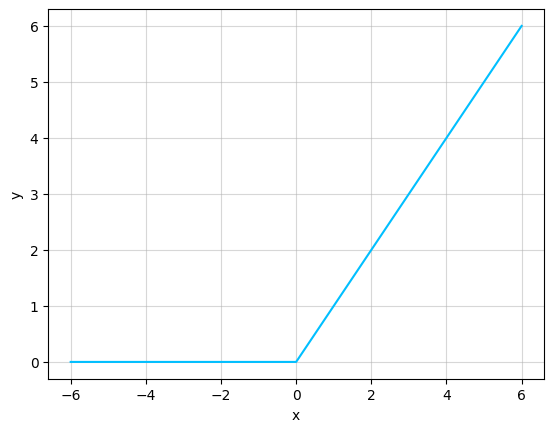

In [4]:
# ReLU function
y = np.maximum(0, x)

# Plot ReLU
plt.figure()
plt.plot(x, y, color='deepskyblue')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.5)
plt.show()

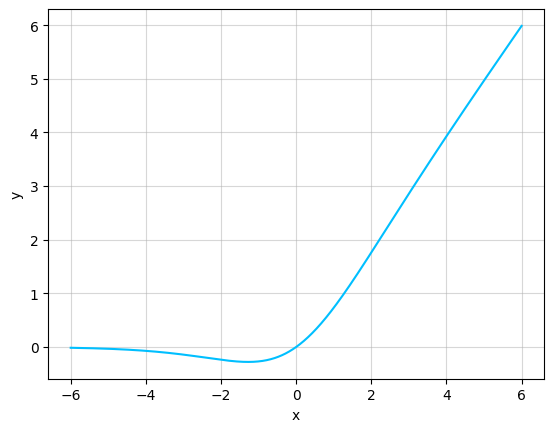

In [5]:
# SiLU function
y = x * (1.0 / (1.0 + np.exp(-x)))

# Plot SiLU
plt.figure()
plt.plot(x, y, color='deepskyblue')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.5)
plt.show()

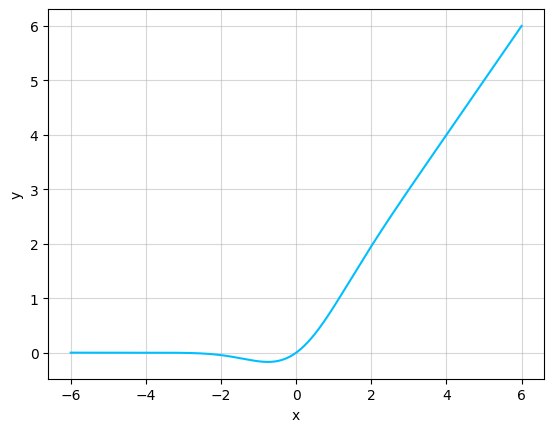

In [6]:
# GELU function
y = 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

# Plot GELU
plt.figure()
plt.plot(x, y, color='deepskyblue')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.5)
plt.show()

**Plot Learning Rate Schedulers**

In [7]:
# Parameters
EPOCHS = 100
MAX_LR = 0.1

# Generate epochs
epochs = np.arange(1, EPOCHS + 1)

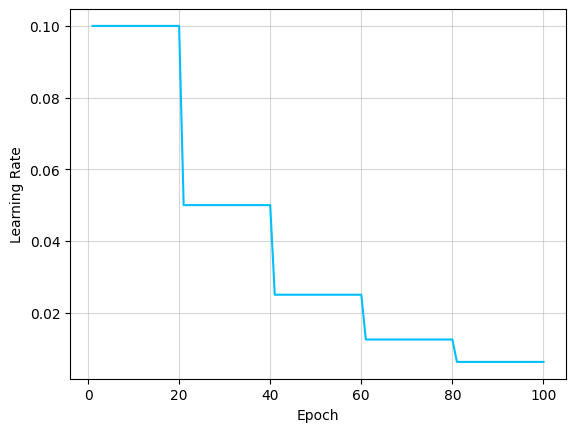

In [8]:
EPOCHS_BEFORE_STEP = 20

# Calculate learning rate for each epoch
lrs = 0.5 ** ((epochs - 1) // EPOCHS_BEFORE_STEP)

# Multiply with max learning rate
lrs = MAX_LR * lrs

# Plot Step Decay
plt.figure()
plt.plot(epochs, lrs, color='deepskyblue')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(alpha=0.5)
plt.show()


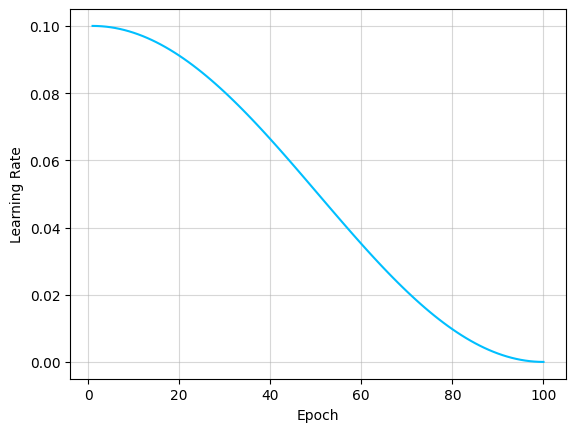

In [9]:
# Calculate learning rate for each epoch
lrs = np.cos(np.pi * (epochs - 1) / (EPOCHS - 1))

# Scale down to [0,1] since cos swings from [-1,1]
lrs = (1 + lrs) / 2

# Multiply with max learning rate
lrs = MAX_LR * lrs

# Plot Cosine Annealing
plt.figure()
plt.plot(epochs, lrs, color='deepskyblue')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(alpha=0.5)
plt.show()

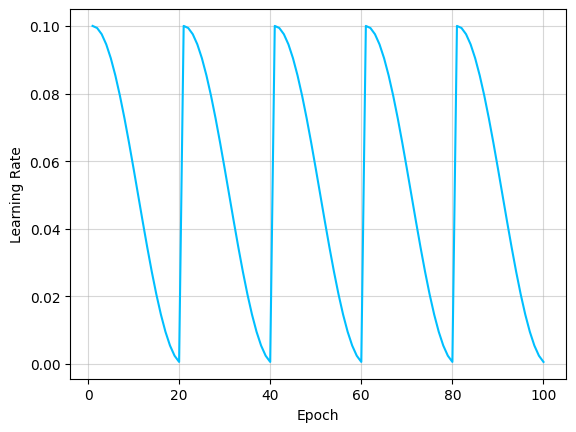

In [10]:
# Restart epochs
RESTART_EPOCH = 20

# Position within cycle
POSITION_CYCLE = (epochs - 1) % RESTART_EPOCH

# Calculate learning rate for each epoch
lrs = np.cos(np.pi * (POSITION_CYCLE) / RESTART_EPOCH)

# Scale down to [0,1] since cos swings from [-1,1]
lrs = (1 + lrs) / 2

# Multiply with max learning rate
lrs = MAX_LR * lrs

# Plot Cosine Annealing with Warm Restarts
plt.figure()
plt.plot(epochs, lrs, color='deepskyblue')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(alpha=0.5)
plt.show()


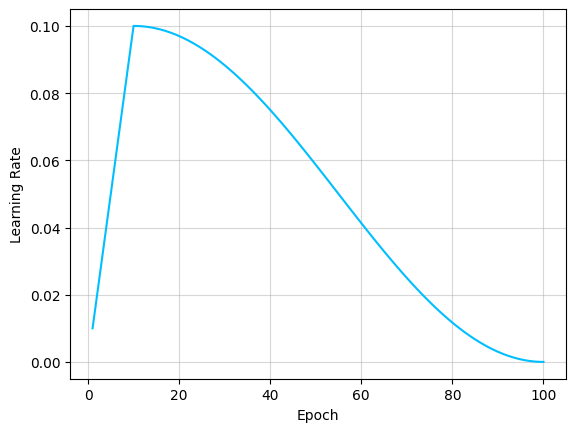

In [11]:
# Number of warmup epochs
WARMUP_EPOCHS = 10


# Step 1: Warmup
warmup_lrs = MAX_LR * (epochs[:WARMUP_EPOCHS] / WARMUP_EPOCHS)


# Step 2: Cosine Annealing
EPOCHS_AFTER_WARMUP = epochs[WARMUP_EPOCHS:] - WARMUP_EPOCHS

# Calculate learning rate for each epoch
decay_lrs = np.cos(np.pi * EPOCHS_AFTER_WARMUP / (EPOCHS - WARMUP_EPOCHS))

# Scale down to [0,1] since cos swings from [-1,1]
decay_lrs = (1 + decay_lrs) / 2

# Multiply with max learning rate
decay_lrs = MAX_LR * decay_lrs


# Step 3: Combine into one schedule
lrs = np.concatenate([warmup_lrs, decay_lrs])

# Plot Cosine Annealing with Warmup
plt.figure()
plt.plot(epochs, lrs, color='deepskyblue')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(alpha=0.5)
plt.show()